### 라이브러리

In [2]:
import pandas as pd
from scipy.stats.mstats import winsorize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 확장기

In [3]:
expansion_normal_win = pd.read_csv('../Data/WIN/expansion_normal_win.csv',encoding='CP949')
expansion_default_win =  pd.read_csv('../Data/WIN/expansion_default_win.csv',encoding='CP949')

In [3]:
expansion_default_win.columns

Index(['회사명', '거래소코드', '회계년도', '유동비율', '차입금의존도', '매출액증가율', '유형자산증가율', '총자본증가율',
       '매출액총이익률', '매출액영업이익률', '매출액순이익률', '총자본영업이익률', '자기자본순이익률', '당좌비율',
       '부채비율', '재고자산회전률', '매출채권회전률', '총자본회전률', '매입채무회전률', '현금순환주기', 'WCTA',
       'RETA', 'TLTA', '이자보상배율', 'vol유동비율', 'vol매출액증가율', 'vol유형자산증가율',
       'vol총자본증가율', 'vol매출액총이익률', 'vol매출액영업이익률', 'vol자기자본순이익률', 'vol총자본영업이익률',
       'vol당좌비율', 'vol부채비율', 'vol이자보상배율', 'vol재고자산회전률', 'vol매출채권회전률',
       'vol총자본회전률', 'vol매입채무회전률', '부도'],
      dtype='object')

In [4]:
# Levene's test 

from scipy.stats import levene
levene_list = []
expansion_list_pick = []
expansion_list_drop = []

for col in expansion_normal_win.iloc[:,3:-1].columns: 
    a = levene(expansion_normal_win.loc[:,col],expansion_default_win.loc[:,col])
    levene_list.append(a)

expansion = pd.DataFrame(levene_list, index= expansion_normal_win.iloc[:,3:-1].columns)
s_t_test = expansion[expansion['pvalue']>0.05] #H0 귀무가설을 채택 => 등분산성
w_t_test = expansion[expansion['pvalue']<=0.05] #H1 귀무가설 기각 => 이분산성 



from scipy import stats
for col in w_t_test.loc[:,'pvalue'].index:
    w_t, w_p = stats.ttest_ind(expansion_normal_win.loc[:,col], expansion_default_win.loc[:,col], equal_var= False)
    
    print("welch's t test Result\n ------------------------")
    # print(f' {col} 이분산 t값은 {w_t:.3f} 이다. ')
    print(f' {col} 이분산 p값은 {w_p:.3f} 이다. ')  
    
    # if w_p <= 0.05 :
    #     print("welch's t test Result\n ------------------------")
    #     print(f' {col} 이분산 t값은 {w_t:.3f} 이다. ')
    #     print(f' {col} 이분산 p값은 {w_p:.3f} 이다. ')  
    #     expansion_list_pick.append(col)
    # else:
    #     expansion_list_drop.append(col)


for col in s_t_test.loc[:,'pvalue'].index:
    s_t, s_p = stats.ttest_ind(expansion_normal_win.loc[:,col], expansion_default_win.loc[:,col], equal_var= True)
    
                                                                                    #equal_var= False : 이분산 
                                                                                    #equal_var= True : 등분산
    print('\n')
    print("student's t test Result\n ------------------------")
    # print(f' {col} 등분산 t값은 {s_t:.3f} 이다. ')
    print(f' {col} 등분산 p값은 {s_p:.3f} 이다. ')

    # if s_p <= 0.05 :
    #     print('\n')
    #     print("student's t test Result\n ------------------------")
    #     print(f' {col} 등분산 t값은 {s_t:.3f} 이다. ')
    #     print(f' {col} 등분산 p값은 {s_p:.3f} 이다. ')
    #     expansion_list_pick.append(col)
    # else:
    #     expansion_list_drop.append(col)

# print(expansion_list_pick)
#
# ['유동비율', '차입금의존도', '매출액증가율', '매출액총이익률', '매출액영업이익률', '매출액순이익률', '총자본영업이익률', '자기자본순이익률', '당좌비율', '부채비율', '총자본회전률', 'RETA', 'TLTA', '이자보상배율', 'vol유동비율', 'vol매출액총이익률', 'vol매출액영업이익률', 'vol총자본영업이익률', 'vol당좌비율', 'vol이자보상배율', '매출채권회전률', '매입채무회전률']


welch's t test Result
 ------------------------
 유동비율 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 차입금의존도 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 매출액증가율 이분산 p값은 0.007 이다. 
welch's t test Result
 ------------------------
 유형자산증가율 이분산 p값은 0.619 이다. 
welch's t test Result
 ------------------------
 총자본증가율 이분산 p값은 0.052 이다. 
welch's t test Result
 ------------------------
 매출액총이익률 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 매출액영업이익률 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 매출액순이익률 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 총자본영업이익률 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 자기자본순이익률 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 당좌비율 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 부채비율 이분산 p값은 0.002 이다. 
welch's t test Result
 ------------------------
 총자본회전률 이분산 p값은 0.000 이다. 
welch's t test Result


In [6]:
# expansion.to_csv('../Data/expansion_ftest.csv',encoding='cp949')

### SMOTE

In [5]:
select = ['유동비율', '차입금의존도', '매출액증가율', '매출액총이익률', '매출액영업이익률', '매출액순이익률', '총자본영업이익률', '자기자본순이익률', '당좌비율', '부채비율', '총자본회전률', 'RETA', 'TLTA', '이자보상배율', 'vol유동비율', 'vol매출액총이익률', 'vol매출액영업이익률', 'vol총자본영업이익률', 'vol당좌비율', 'vol이자보상배율', '매출채권회전률', '매입채무회전률','부도']

In [6]:
# expansion = pd.concat([expansion_normal_win[select], expansion_default_win[select]], axis=0)
# expansion_x = expansion.iloc[:,:-1]
# expansion_y = expansion['부도']

In [13]:
select_std_final = ['RETA','매출액영업이익률','총자본영업이익률','매출액순이익률',
              '이자보상배율','vol매출액영업이익률','vol매출액총이익률']
select_std = ['RETA','매출액영업이익률','총자본영업이익률','매출액순이익률',
              '이자보상배율','vol매출액영업이익률','vol매출액총이익률','부도']


In [14]:
expansion = pd.concat([expansion_normal_win[select_std], expansion_default_win[select_std]], axis=0)
expansion_x = expansion.iloc[:,:-1]
expansion_y = expansion['부도']

In [15]:
# transition_norm = pd.read_csv('../Data/WIN/transition_normal_win.csv',encoding='cp949')
# transition_d = pd.read_csv('../Data/WIN/transition_default_win.csv',encoding='cp949')
# transition = pd.concat([transition_norm,transition_d],axis=0)

# transition_x = transition[select_std_final]
# transition_y = transition['부도']


In [16]:
from sklearn.model_selection import train_test_split
X_train,RAW_X_test,y_train,RAW_y_test = train_test_split(expansion_x,expansion_y,test_size = 0.3, stratify = expansion_y, random_state=1024)

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

scaler_min = MinMaxScaler(feature_range=(-1, 1)) #-1에서 1 사이로 minmax
scaler_std = StandardScaler()
# scaler_rs = RobustScaler()

X_train_min = scaler_min.fit_transform(X_train)
X_test_min = scaler_min.transform(RAW_X_test)
X_test_min=pd.DataFrame(X_test_min)
X_test_min.columns = expansion_x.columns

X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(RAW_X_test)
# transition_x =scaler_std.transform(transition_x)
X_test_std=pd.DataFrame(X_test_std)
# transition_x=pd.DataFrame(transition_x,columns=select_std_final)

X_test_std.columns = expansion_x.columns

# X_train_rs = scaler_rs.fit_transform(X_train)


sm = SMOTE(sampling_strategy={1:int(y_train.value_counts().iloc[0]/2),0:y_train.value_counts().iloc[0]},random_state=1024)
# train데이터를 넣어 복제함
X_train_min = pd.DataFrame(X_train_min)
X_resampled_min, y_resampled_min = sm.fit_resample(X_train_min,y_train)
X_resampled_min.columns = expansion_x.columns

print('After OverSampling, the shape of train_X: {}'.format(X_resampled_min.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled_min.shape))
print('MinMaxScaler - SMOTE 적용 후 값의 분포 :\n',y_resampled_min.value_counts())
print('-----------------------------------------------------')


X_train_std = pd.DataFrame(X_train_std)
X_resampled_std, y_resampled_std = sm.fit_resample(X_train_std,y_train)
X_resampled_std.columns = expansion_x.columns

print('After OverSampling, the shape of train_X: {}'.format(X_resampled_std.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled_std.shape))
print('StandardScaler - SMOTE 적용 후 값의 분포 :\n',y_resampled_std.value_counts())

# X_train_rs = pd.DataFrame(X_train_rs)
# X_resampled_rs, y_resampled_rs = sm.fit_resample(X_train_rs,y_train)
# X_resampled_rs.columns = expansion_x.columns

# print('After OverSampling, the shape of train_X: {}'.format(X_resampled_rs.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled_rs.shape))
# print('RobustScaler - SMOTE 적용 후 값의 분포 :\n',y_resampled_rs.value_counts())
# # print('-----------------------------------------------------')


After OverSampling, the shape of train_X: (7534, 7)
After OverSampling, the shape of train_y: (7534,) 

StandardScaler - SMOTE 적용 후 값의 분포 :
 0.0    5023
1.0    2511
Name: 부도, dtype: int64


In [20]:
RAW_y_test.reset_index(drop=True,inplace=True)

In [19]:
# transition_x

,RETA,매출액영업이익률,총자본영업이익률,매출액순이익률,이자보상배율,vol매출액영업이익률,vol매출액총이익률
0,-0.256870,0.091499,-0.196018,0.196146,-0.360121,0.094111,0.059918
1,-1.844803,-1.862146,-1.848696,-1.116575,-0.539171,-1.839788,-1.799602
2,-1.844803,0.193390,-0.069418,0.030065,-0.325166,1.554533,1.744155
3,-1.844803,0.199297,-0.191111,0.216322,-0.363923,1.554533,1.602404
4,-0.542911,-0.640933,-1.062594,-0.558228,-0.432084,-0.991208,-0.462882
...,...,...,...,...,...,...,...
5670,-0.943467,-2.019166,-2.368838,-1.461267,-0.449475,-1.195955,-0.999399
5671,-0.141471,0.046707,-0.303972,0.254338,-0.371503,0.014932,-0.871366
5672,0.069749,0.471990,0.282905,0.288956,-0.339307,0.034127,-0.193099
5673,-1.726970,-7.694041,-0.777007,-15.145972,-0.380128,-7.729462,3.105262


In [22]:
# transition_y.reset_index(drop=True,inplace=True)

In [24]:
# pd.concat([transition_x,transition_y],axis=1).to_csv('../Data/WIN_UP/transition_test.csv',index=False,encoding='cp949')

In [21]:
# test = pd.concat([RAW_X_test,RAW_y_test],axis=1)
# test.to_csv('../Data/WIN_UP/expansion_win_test.csv',index=False, encoding='cp949')

# test_min = pd.concat([X_test_min,RAW_y_test],axis=1)
# test_min.to_csv('../Data/WIN_UP/expansion_win_min_test.csv',index=False,encoding='cp949')

# test_std = pd.concat([X_test_std,RAW_y_test],axis=1)
# test_std.to_csv('../Data/WIN_UP/expansion_win_std_test.csv',index=False,encoding='cp949')

# upsample = pd.concat([X_resampled_min,y_resampled_min],axis=1)
# upsample.to_csv('../Data/WIN_UP/expansion_win_min_smote.csv',index=False, encoding='cp949')

# upsample_std = pd.concat([X_resampled_std,y_resampled_std],axis=1)
# upsample_std.to_csv('../Data/WIN_UP/expansion_win_std_smote.csv',index=False, encoding='cp949')

### DT

In [22]:
# from sklearn.metrics import f1_score
# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'ccp_alpha': [0.1, .01, .001],
#               'max_depth' : [5, 6, 7, 8, 9],
#               'criterion' :['gini', 'entropy']
#              }
# tree_clas = DecisionTreeClassifier(random_state=1024)
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
# grid_search.fit(X_resampled_min, y_resampled_min)
# final_model = grid_search.best_estimator_
# final_model

0.975
0.930


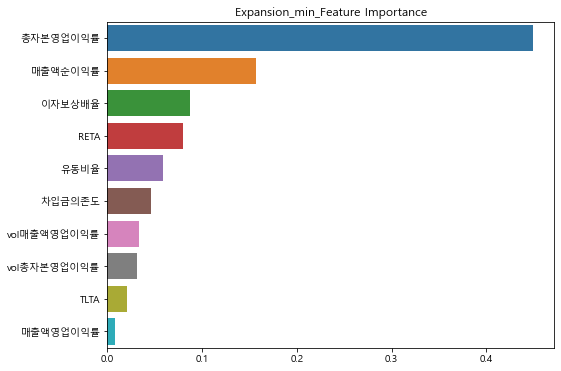

In [23]:
from sklearn.tree import  DecisionTreeClassifier
tree = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='auto',
                       random_state=1024)
tree.fit(X_resampled_min,y_resampled_min)
score_tr_min = tree.score(X_resampled_min,y_resampled_min)
score_te_min = tree.score(RAW_X_test,RAW_y_test)


print('{:.3f}'.format(score_tr_min))
# 1.000
print('{:.3f}'.format(score_te_min))

feature_imp_min = tree.feature_importances_

dt_seires= pd.Series(feature_imp_min,index=X_resampled_min.columns)
dt_top10=dt_seires.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Expansion_min_Feature Importance')
sns.barplot(x=dt_top10,y=dt_top10.index)
plt.show()

In [24]:
ex_dt = pd.DataFrame(dt_top10,columns=['Top10 Expansion DT Feature Importances(min)'])
# ex_dt.to_csv('../Data/features/top10_expansion_dt_FI.csv', encoding='cp949')


In [25]:
ex_dt

,Top10 Expansion DT Feature Importances(min)
총자본영업이익률,0.448679
매출액순이익률,0.157257
이자보상배율,0.086617
RETA,0.079358
유동비율,0.058400
차입금의존도,0.045587
vol매출액영업이익률,0.033247
vol총자본영업이익률,0.031011
TLTA,0.020571
매출액영업이익률,0.007832


In [26]:
# X_train,X_test,y_train,y_test = train_test_split(X_resampled_std,y_resampled_std,test_size=0.2)

# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'ccp_alpha': [0.1, .01, .001],
#               'max_depth' : [5, 6, 7, 8, 9],
#               'criterion' :['gini', 'entropy']
#              }
# tree_clas = DecisionTreeClassifier(random_state=1024)
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
# grid_search.fit(X_train, y_train)
# final_model = grid_search.best_estimator_
# final_model

0.974
0.769


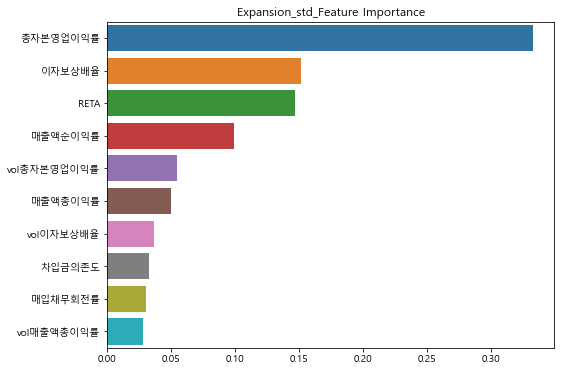

In [27]:
from sklearn.tree import  DecisionTreeClassifier

tree = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)
tree.fit(X_resampled_std,y_resampled_std)
score_tr = tree.score(X_resampled_std,y_resampled_std)
score_te = tree.score(RAW_X_test,RAW_y_test)

print('{:.3f}'.format(score_tr))
# 1.000
print('{:.3f}'.format(score_te))

feature_imp = tree.feature_importances_

dt_seires= pd.Series(feature_imp,index=X_resampled_std.columns)
dt_top10=dt_seires.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Expansion_std_Feature Importance')
sns.barplot(x=dt_top10,y=dt_top10.index)
plt.show()

In [28]:
ex_dt_std = pd.DataFrame(dt_top10,columns=['Top10 Expansion DT Feature Importances(std)'])
ex_dt_std
# ex_dt_std.to_csv('../Data/features/top10_expansion_dt_std_FI.csv',encoding='cp949')

,Top10 Expansion DT Feature Importances(std)
총자본영업이익률,0.332879
이자보상배율,0.151358
RETA,0.147035
매출액순이익률,0.099152
vol총자본영업이익률,0.054235
매출액총이익률,0.049404
vol이자보상배율,0.036244
차입금의존도,0.032402
매입채무회전률,0.030484
vol매출액총이익률,0.027534


In [29]:
ex_dt = pd.concat([ex_dt,ex_dt_std],axis=1)
ex_dt

,Top10 Expansion DT Feature Importances(min),Top10 Expansion DT Feature Importances(std)
총자본영업이익률,0.448679,0.332879
매출액순이익률,0.157257,0.099152
이자보상배율,0.086617,0.151358
RETA,0.079358,0.147035
유동비율,0.058400,NaN
차입금의존도,0.045587,0.032402
vol매출액영업이익률,0.033247,NaN
vol총자본영업이익률,0.031011,0.054235
TLTA,0.020571,NaN
매출액영업이익률,0.007832,NaN


In [30]:
# ex_dt.to_csv('../Data/features/expansion_dt.csv',encoding='cp949')

### RF

In [31]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'max_depth' : [5, 6, 7, 8, 9],
#               'criterion' :['gini', 'entropy'],
#               'n_estimators':[10,20,30,40,50,60,70,80,90,100]
#              }
# tree_clas = RandomForestClassifier(random_state=1024)
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
# grid_search.fit(X_resampled_min, y_resampled_min)
# final_model = grid_search.best_estimator_
# final_model

0.997
0.009


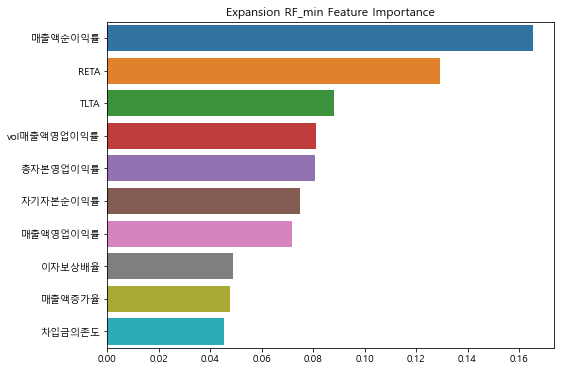

In [32]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(max_depth=9, n_estimators=90, random_state=1024)
tree.fit(X_resampled_min,y_resampled_min)
score_tr = tree.score(X_resampled_min,y_resampled_min)
score_te = tree.score(RAW_X_test,RAW_y_test)

print('{:.3f}'.format(score_tr))
# 1.000
print('{:.3f}'.format(score_te))


feature_imp = tree.feature_importances_

dt_seires= pd.Series(feature_imp,index=X_resampled_min.columns)
dt_top10=dt_seires.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Expansion RF_min Feature Importance')
sns.barplot(x=dt_top10,y=dt_top10.index)
plt.show()

In [33]:
ex_rf = pd.DataFrame(dt_top10,columns=['Top10 Expansion RF Feature Importances(min)'])
# ex_rf.to_csv('../Data/features/top10_expansion_rf_FI.csv', encoding='cp949')

In [34]:
ex_rf

,Top10 Expansion RF Feature Importances(min)
매출액순이익률,0.165309
RETA,0.129142
TLTA,0.088204
vol매출액영업이익률,0.080995
총자본영업이익률,0.080574
자기자본순이익률,0.074966
매출액영업이익률,0.071668
이자보상배율,0.048749
매출액증가율,0.047808
차입금의존도,0.045442


In [35]:
# from sklearn.ensemble import RandomForestClassifier
# X_train,X_test,y_train,y_test = train_test_split(X_resampled_std,y_resampled_std,test_size=0.2)

# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'max_depth' : [5, 6, 7, 8, 9],
#               'criterion' :['gini', 'entropy'],
#               'n_estimators':[10,20,30,40,50,60,70,80,90,100]
#              }
# tree_clas = RandomForestClassifier(random_state=1024)
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
# grid_search.fit(X_train, y_train)
# final_model = grid_search.best_estimator_
# final_model

0.993
0.437


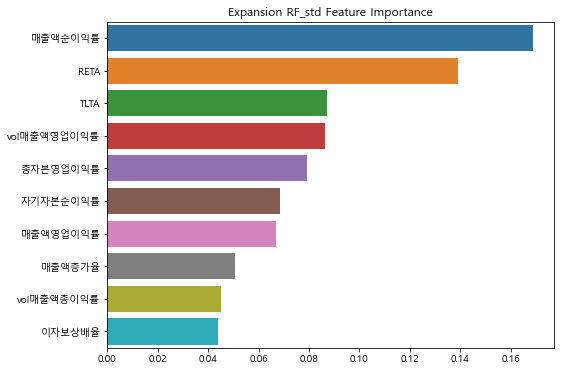

In [36]:
tree = RandomForestClassifier(max_depth=9, max_features='log2', random_state=1024)
tree.fit(X_resampled_std,y_resampled_std)
score_tr = tree.score(X_resampled_std,y_resampled_std)
score_te = tree.score(RAW_X_test,RAW_y_test)

print('{:.3f}'.format(score_tr))
# 1.000
print('{:.3f}'.format(score_te))


feature_imp = tree.feature_importances_

dt_seires= pd.Series(feature_imp,index=X_resampled_std.columns)
dt_top10=dt_seires.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Expansion RF_std Feature Importance')
sns.barplot(x=dt_top10,y=dt_top10.index)
plt.show()

In [37]:
ex_rf_std = pd.DataFrame(dt_top10,columns=['Top10 Expansion RF Feature Importances(std)'])
ex_rf_std
# ex_rf_std.to_csv('../Data/features/top10_expansion_rf_std_FI.csv', encoding='cp949')

,Top10 Expansion RF Feature Importances(std)
매출액순이익률,0.168740
RETA,0.139084
TLTA,0.086961
vol매출액영업이익률,0.086290
총자본영업이익률,0.079019
자기자본순이익률,0.068389
매출액영업이익률,0.066753
매출액증가율,0.050459
vol매출액총이익률,0.045039
이자보상배율,0.043808


In [38]:
ex_rf = pd.concat([ex_rf,ex_rf_std],axis=1)
# ex_rf.to_csv('../Data/features/expansion_rf.csv',encoding='cp949')

### LR
변수 개수 6개 

MinMax

In [57]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 모델 입력, n_features_to_select: 골라낼 변수의 수, step: 한번에 몇개씩 제거할지 선택
rfe = RFE(lr, n_features_to_select=6, step=1)
# rfe = RFE(lr, step=1)

X_resampled_min_logit = pd.DataFrame(X_resampled_min)
model = rfe.fit(X_resampled_min,y_resampled_min)

# 선택될 변수
model.support_
# 변수 중요도(숫자 높을수록 불필요하다)
model.ranking_

array([12, 15, 13,  5,  1,  1,  4,  3, 16,  1,  6,  1,  1, 11,  8,  1,  2,
        9,  7, 14, 17, 10])

In [58]:
rank = model.ranking_.tolist()

lr_rank = pd.DataFrame(rank ,index = [X_resampled_min.columns],columns=['rank(min)'])
lr_rank.sort_values(by='rank(min)',inplace=True)
lr_rank_min = lr_rank.iloc[:6]
# lr_rank.iloc[:6].to_csv('../Data/features/lr_min.csv', encoding='cp949')

In [63]:
lr_rank_min

,rank(min)
매출액영업이익률,1
매출액순이익률,1
부채비율,1
vol매출액총이익률,1
RETA,1
TLTA,1


In [62]:
import statsmodels.api as sm
model = sm.Logit(y_resampled_min,X_resampled_min)
results = model.fit()
results.summary()
# np.exp(results.params) #로지스틱 회귀계수 출력

Optimization terminated successfully.
         Current function value: 0.196382
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     부도   No. Observations:                 7534
Model:                          Logit   Df Residuals:                     7512
Method:                           MLE   Df Model:                           21
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.6915
Time:                        10:31:44   Log-Likelihood:                -1479.5
converged:                       True   LL-Null:                       -4795.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
유동비율           -1.1902      0.863     -1.379      0.168      -2.882       0.502
차입금의존도         -1.1503      0.292     -3.942      0.000      -1.722      -0.578
매출액증가율         -0.5135      0.194     -2.643      0.008      -0.894      -0.133
매출액총이익률        -1.7919      0.275     -6.508      0.000      -2.332      -1.252
매출액영업이익률       -2.7202      0.643     -4.233      0.000      -3.980      -1.461
매출액순이익률         1.9473      0.926      2.104      0.035       0.133       3.761
총자본영업이익률        4.0962      0.603      6.789      0.000       2.914       5.279
자기자본순이익률       -4.8368      0.637     -7.594      0.000      -6.085      -3.588
당좌비율            1.7008      0.829      2.051      0.040       0.076       3.326
부채비율            5.0815      0.853      5.955      0.000       3.409       6.754
총자본회전률         -1.5384      0.175     -8.767      0.000      -1.882      -1.195
RETA           -5.0202      0.455    -11.043      0.000      -5.911      -4.129
TLTA            6.6147      0.526     12.577      0.000       5.584       7.645
이자보상배율        -17.2248      1.043    -16.507      0.000     -19.270     -15.180
vol유동비율        31.6400      3.516      8.998      0.000      24.748      38.532
vol매출액총이익률      4.5460      0.341     13.334      0.000       3.878       5.214
vol매출액영업이익률    -6.7724      0.685     -9.884      0.000      -8.115      -5.429
vol총자본영업이익률     1.4867      0.492      3.020      0.003       0.522       2.451
vol당좌비율       -32.3200      3.494     -9.251      0.000     -39.168     -25.472
vol이자보상배율       1.1017      0.323      3.407      0.001       0.468       1.735
매출채권회전률        -0.1624      0.131     -1.237      0.216      -0.420       0.095
매입채무회전률        -1.1845      0.172     -6.888      0.000      -1.522      -0.847
===============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [64]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X=X_resampled_min
y=y_resampled_min
# X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=123)
# X1=sm.add_constant(X)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.196382
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                     부도   No. Observations:                 7534
Model:                          Logit   Df Residuals:                     7512
Method:                           MLE   Df Model:                           21
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.6915
Time:                        10:42:34   Log-Likelihood:                -1479.5
converged:                       True   LL-Null:                       -4795.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
유동비율           -1.1902      0.863     -1.379      0.168      -2.882       0.502
차입금의존도         -1.1503   

In [34]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X_logit_min=X_resampled_min
y_logit_min=y_resampled_min
# X_logit_min=sm.add_constant(X_logit_min)
logit_model_min=sm.Logit(y_logit_min,X_logit_min)
result_logit_min=logit_model_min.fit()
print(result_logit_min.summary())
a = np.exp(result_logit_min.params) #로지스틱 회귀계수 출력
a = pd.DataFrame(a)
a.columns=['계수']
a = a.sort_values(by='계수',ascending=False)
a

Optimization terminated successfully.
         Current function value: 0.196382
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                     부도   No. Observations:                 7534
Model:                          Logit   Df Residuals:                     7512
Method:                           MLE   Df Model:                           21
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.6915
Time:                        21:39:36   Log-Likelihood:                -1479.5
converged:                       True   LL-Null:                       -4795.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
유동비율           -1.1902      0.863     -1.379      0.168      -2.882       0.502
차입금의존도         -1.1503   

,계수
vol유동비율,5.509295e+13
TLTA,7.459717e+02
부채비율,1.610105e+02
vol매출액총이익률,9.425716e+01
총자본영업이익률,6.011147e+01
매출액순이익률,7.009801e+00
당좌비율,5.478284e+00
vol총자본영업이익률,4.422556e+00
vol이자보상배율,3.009162e+00
매출채권회전률,8.501377e-01


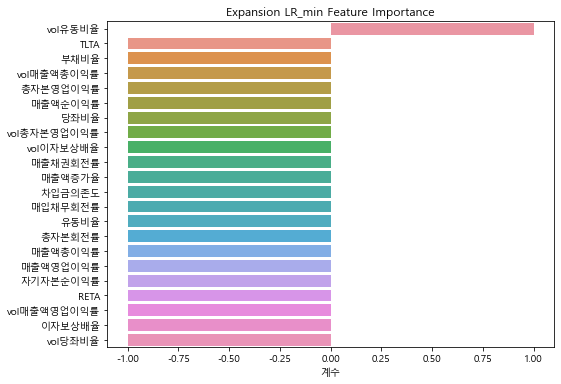

In [35]:
scaler = MinMaxScaler(feature_range=(-1, 1))
b = scaler.fit_transform(a)

b = pd.DataFrame(b)
b.columns=['계수']
b.index= a.index

plt.figure(figsize=(8,6))
plt.title('Expansion LR_min Feature Importance')
sns.barplot(x=b['계수'],y=b.index)
plt.show()

In [66]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 모델 입력, n_features_to_select: 골라낼 변수의 수, step: 한번에 몇개씩 제거할지 선택
rfe = RFE(lr, n_features_to_select=6, step=1)
X_resampled_std_logit = pd.DataFrame(X_resampled_std)
model = rfe.fit(X_resampled_std,y_resampled_std)
# 선택될 변수
model.support_
# 변수 중요도(숫자 높을수록 불필요하다)
model.ranking_

array([10, 12, 14,  8,  1, 15,  1,  1,  9, 11,  7,  3,  1,  2,  1,  5,  6,
       16,  1, 13, 17,  4])

In [67]:
rank = model.ranking_.tolist()

lr_rank = pd.DataFrame(rank ,index = [X_resampled_std.columns],columns=['rank(std)'])
lr_rank.sort_values(by='rank(std)',inplace=True)
lr_rank_std = lr_rank.iloc[:6]
# lr_rank.iloc[:6].to_csv('../Data/features/lr_std.csv', encoding='cp949')

In [68]:
lr_rank_std

,rank(std)
vol당좌비율,1
매출액영업이익률,1
vol유동비율,1
총자본영업이익률,1
자기자본순이익률,1
TLTA,1


In [36]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X_logit_std=X_resampled_std
y_logit_std=y_resampled_std
# X_logit_std=sm.add_constant(X_logit_std)
logit_model_std=sm.Logit(y_logit_std,X_logit_std)
result_logit_std=logit_model_std.fit()
print(result_logit_std.summary())
a = np.exp(result_logit_std.params) #로지스틱 회귀계수 출력
a = pd.DataFrame(a)
a.columns=['계수']
a = a.sort_values(by='계수',ascending=False)

Optimization terminated successfully.
         Current function value: 0.524988
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     부도   No. Observations:                 7534
Model:                          Logit   Df Residuals:                     7512
Method:                           MLE   Df Model:                           21
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.1752
Time:                        21:39:43   Log-Likelihood:                -3955.3
converged:                       True   LL-Null:                       -4795.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
유동비율            0.1876      0.141      1.330      0.184      -0.089       0.464
차입금의존도         -0.0991    

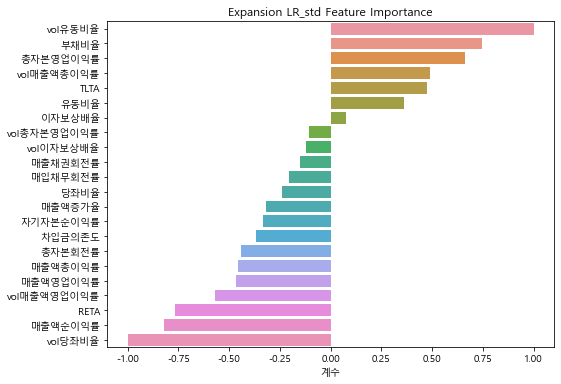

In [37]:
scaler = MinMaxScaler(feature_range=(-1, 1))
b = scaler.fit_transform(a)

b = pd.DataFrame(b)
b.columns=['계수']
b.index= a.index

plt.figure(figsize=(8,6))
plt.title('Expansion LR_std Feature Importance')
sns.barplot(x=b['계수'],y=b.index)
plt.show()

In [69]:
import statsmodels.api as sm
model = sm.Logit(y_resampled_std,X_resampled_std)
results = model.fit()
results.summary()
# np.exp(results.params) #로지스틱 회귀계수 출력

Optimization terminated successfully.
         Current function value: 0.524988
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     부도   No. Observations:                 7534
Model:                          Logit   Df Residuals:                     7512
Method:                           MLE   Df Model:                           21
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.1752
Time:                        10:50:06   Log-Likelihood:                -3955.3
converged:                       True   LL-Null:                       -4795.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
유동비율            0.1876      0.141      1.330      0.184      -0.089       0.464
차입금의존도         -0.0991      0.055     -1.808      0.071      -0.207       0.008
매출액증가율         -0.0764      0.034     -2.270      0.023      -0.142      -0.010
매출액총이익률        -0.1385      0.036     -3.823      0.000      -0.210      -0.068
매출액영업이익률       -0.1441      0.063     -2.270      0.023      -0.269      -0.020
매출액순이익률        -0.3301      0.075     -4.398      0.000      -0.477      -0.183
총자본영업이익률        0.2852      0.075      3.811      0.000       0.139       0.432
자기자본순이익률       -0.0820      0.057     -1.432      0.152      -0.194       0.030
당좌비율           -0.0423      0.141     -0.300      0.764      -0.319       0.234
부채비율            0.3109      0.053      5.907      0.000       0.208       0.414
총자본회전률         -0.1335      0.040     -3.370      0.001      -0.211      -0.056
RETA           -0.2990      0.040     -7.400      0.000      -0.378      -0.220
TLTA            0.2260      0.069      3.267      0.001       0.090       0.362
이자보상배율          0.0853      0.042      2.028      0.043       0.003       0.168
vol유동비율         0.3848      0.159      2.422      0.015       0.073       0.696
vol매출액총이익률      0.2312      0.040      5.743      0.000       0.152       0.310
vol매출액영업이익률    -0.1952      0.046     -4.288      0.000      -0.284      -0.106
vol총자본영업이익률     0.0144      0.049      0.294      0.769      -0.082       0.110
vol당좌비율        -0.4365      0.158     -2.762      0.006      -0.746      -0.127
vol이자보상배율       0.0084      0.038      0.220      0.826      -0.066       0.083
매출채권회전률        -0.0043      0.032     -0.136      0.891      -0.067       0.058
매입채무회전률        -0.0265      0.032     -0.825      0.410      -0.090       0.037
===============================================================================
"""

In [43]:
ex_lr = pd.concat([lr_rank_min,lr_rank_std],axis=1)
# ex_lr.to_csv('../Data/features/expansion_lr.csv',encoding='cp949')

### XGBoost

In [44]:
# # 확장기 xgb min
# import xgboost
# from xgboost import XGBClassifier
# from sklearn import model_selection
# from sklearn.model_selection import GridSearchCV
# X_train,X_test,y_train,y_test = train_test_split(X_resampled_min,y_resampled_min,test_size=0.2)
# xg = XGBClassifier()
# xg_parameters ={'max_depth' : [3,4,5,6] , 'n_estimators': [12,24,32], 'learning_rate':[0.01, 0.1], 'gamma': [0.5, 1, 2], 'random_state':[99]}
# grid_search_xg = model_selection.GridSearchCV ( estimator = xg, param_grid = xg_parameters, scoring = 'recall', cv = 10 )
# grid_search_xg.fit(X_train, y_train)
# best_xg = grid_search_xg.best_estimator_
# best_xg

[10:23:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.996
0.009


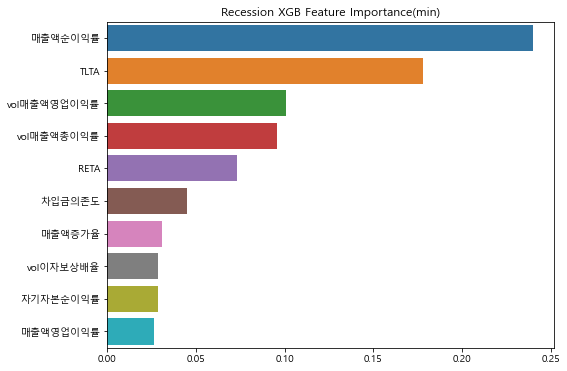

In [45]:
import xgboost
from xgboost import XGBClassifier
xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=24, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=99,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
# reg_alpha=1
xg.fit(X_resampled_min,y_resampled_min)
score_tr = xg.score(X_resampled_min,y_resampled_min)
score_te = xg.score(RAW_X_test,RAW_y_test)
print('{:.3f}'.format(score_tr))
# 1.000
print('{:.3f}'.format(score_te))
feature_imp =xg.feature_importances_
dt_seires= pd.Series(feature_imp,index=X_resampled_min.columns)
dt_top10=dt_seires.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('Recession XGB Feature Importance(min)')
sns.barplot(x=dt_top10,y=dt_top10.index)
plt.show()

In [46]:
ex_xgb = pd.DataFrame(dt_top10,columns=['Top10 Expansion XGBoost Feature Importances(min)'])
# ex_xgb.to_csv('../Data/features/top10_expansion_xgb_FI.csv', encoding='cp949')

In [47]:
ex_xgb

,Top10 Expansion XGBoost Feature Importances(min)
매출액순이익률,0.239812
TLTA,0.178214
vol매출액영업이익률,0.100606
vol매출액총이익률,0.095555
RETA,0.073105
차입금의존도,0.044630
매출액증가율,0.030677
vol이자보상배율,0.028602
자기자본순이익률,0.028571
매출액영업이익률,0.026239


In [48]:
# 확장기 xgb min
# import xgboost
# from xgboost import XGBClassifier
# from sklearn import model_selection
# from sklearn.model_selection import GridSearchCV
# X_train,X_test,y_train,y_test = train_test_split(X_resampled_std,y_resampled_std,test_size=0.2)
# xg = XGBClassifier()
# xg_parameters ={'max_depth' : [3,4,5,6] , 'n_estimators': [12,24,32], 'learning_rate':[0.01, 0.1], 'gamma': [0.5, 1, 2], 'random_state':[99]}
# grid_search_xg = model_selection.GridSearchCV ( estimator = xg, param_grid = xg_parameters, scoring = 'recall', cv = 10 )
# grid_search_xg.fit(X_train, y_train)
# best_xg = grid_search_xg.best_estimator_
# best_xg

[10:23:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.937
0.137


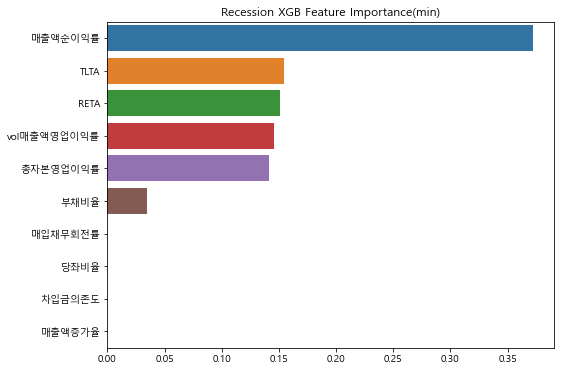

In [49]:
import xgboost
from xgboost import XGBClassifier
X_train,X_test,y_train,y_test = train_test_split(X_resampled_std,y_resampled_std,test_size=0.2)
xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1,
              monotone_constraints='()', n_estimators=12, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=99,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
# reg_alpha=1
xg.fit(X_resampled_std,y_resampled_std)
score_tr = xg.score(X_resampled_std,y_resampled_std)
score_te = xg.score(RAW_X_test,RAW_y_test)
print('{:.3f}'.format(score_tr))
# 1.000
print('{:.3f}'.format(score_te))
feature_imp =xg.feature_importances_
dt_seires= pd.Series(feature_imp,index=X_resampled_std.columns)
dt_top10=dt_seires.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('Recession XGB Feature Importance(min)')
sns.barplot(x=dt_top10,y=dt_top10.index)
plt.show()

In [50]:
ex_xgb_std = pd.DataFrame(dt_top10,columns=['Top10 Expansion XGBoost Feature Importances(std)'])
# ex_xgb_std.to_csv('../Data/features/top10_expansion_xgb_std_FI.csv', encoding='cp949')


In [51]:
ex_xgb = pd.concat([ex_xgb,ex_xgb_std],axis=1)
# ex_xgb.to_csv('../Data/features/expansion_xgb.csv',encoding='cp949')